# Machine Learning Model

###
The student data in the student-mat.csv file was explored. A machine learning model to predict a student’s performance based on select features was created. Which can hopefully be used this information to identify students who might need additional assistance and interventions to improve their grades.

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 20)
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("student-mat.csv")

In [3]:
# Explore data
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,0.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,0.0,1.0,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,2.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,1.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [4]:
# Explore data
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,383.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,382.000000,386.000000,381.000000,395.000000,395.000000,395.000000
mean,16.699739,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,0.672775,1.093264,4.173228,10.908861,10.713924,10.415190
std,1.280615,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,1.300209,1.465307,4.897520,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,2.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,11.000000,36.000000,19.000000,19.000000,20.000000


In [5]:
#Explore data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [6]:
# Drop target column
X = data.drop(columns=['G3'])
# Set target as y
y = data['G3']                 

In [7]:
from sklearn.model_selection import train_test_split

# Create a training and test set, where 80% is training data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       
    random_state=42     
)

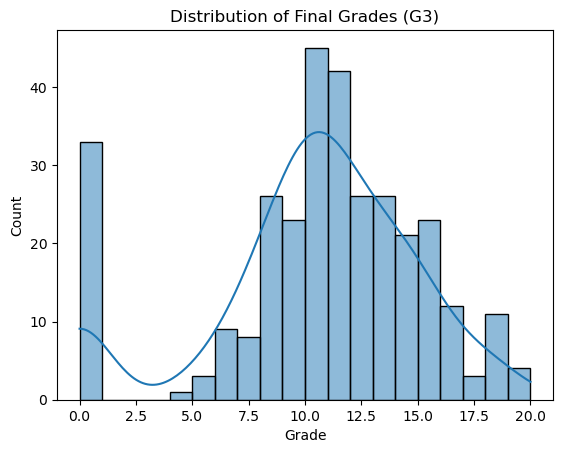

<Figure size 640x480 with 0 Axes>

In [8]:
#Create a histo plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(y_train, kde=True, bins=20)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()
plt.savefig('my_plot.png')


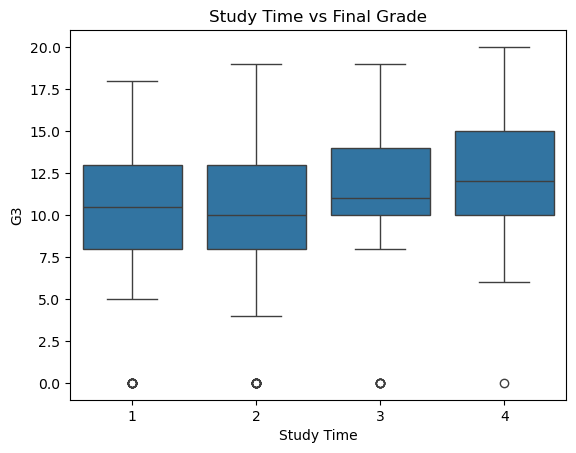

<Figure size 640x480 with 0 Axes>

In [9]:
#Create a boxplot, looking for trends or obvious correlations
sns.boxplot(x=X_train['studytime'], y=y_train)
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time')
plt.ylabel('G3')
plt.show()
plt.savefig('my_plot.png')

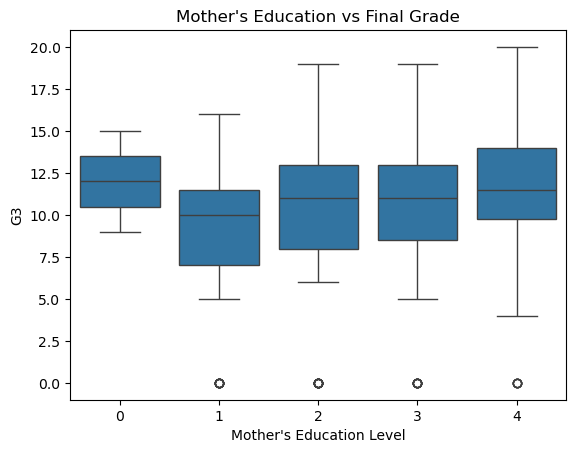

<Figure size 640x480 with 0 Axes>

In [10]:
#Create box plot looking at Mothers education level against final grades
sns.boxplot(x=X_train['Medu'], y=y_train)
plt.title("Mother's Education vs Final Grade")
plt.xlabel("Mother's Education Level")
plt.ylabel("G3")
plt.show()
plt.savefig('my_plot.png')

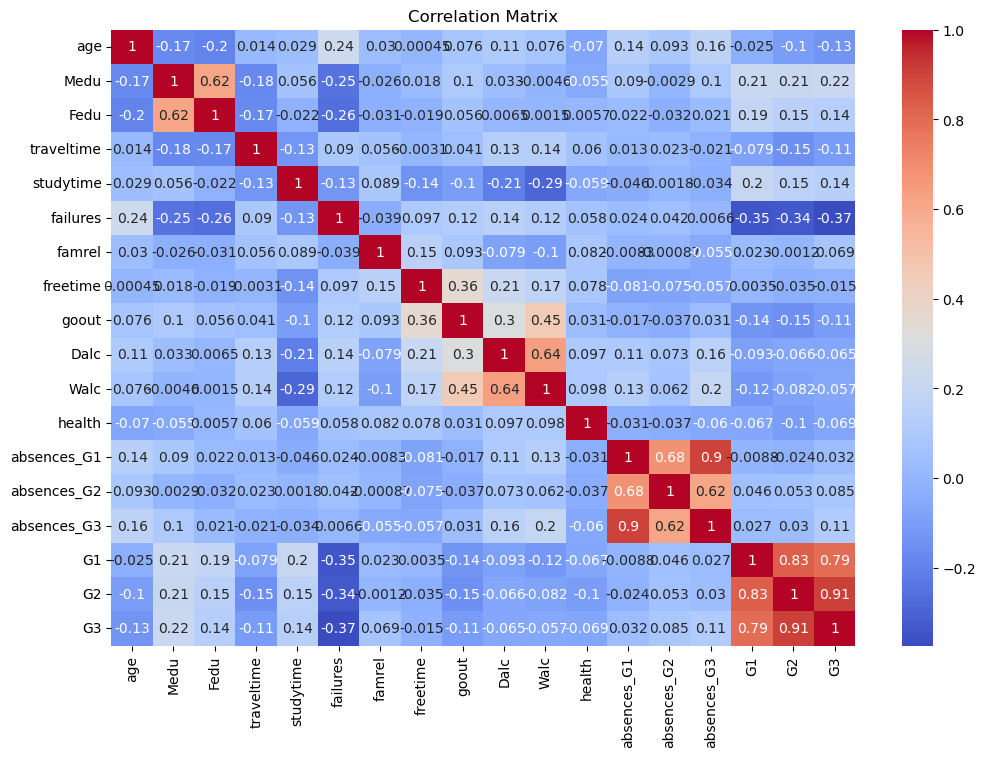

<Figure size 640x480 with 0 Axes>

In [11]:
import numpy as np

# Include G1, G2, G3 for correlation insight
numeric_features = X_train.select_dtypes(include=np.number)
numeric_features['G3'] = y_train

# Correlation matrix to immediately see which attributes have a relationship
corr_matrix = numeric_features.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
plt.savefig('my_plot.png')


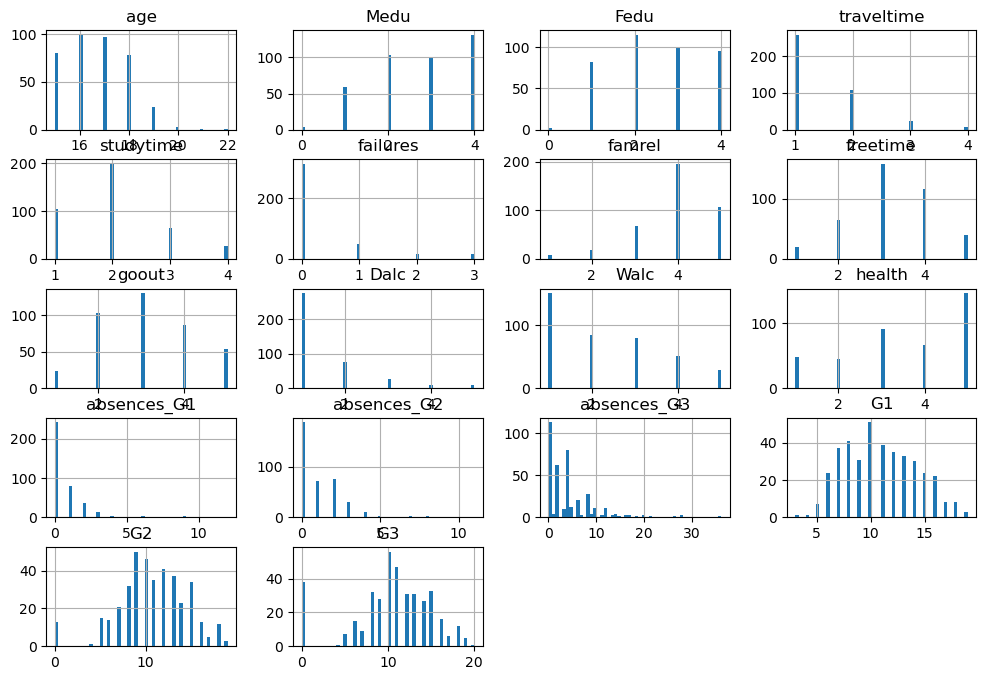

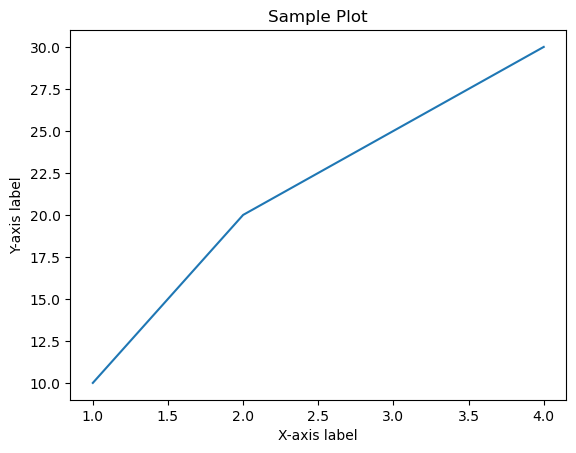

In [12]:
import matplotlib.pyplot as plt
#Additional visuals that aren't great, but worth exploring
data.hist(bins=50, figsize=(12, 8))
plt.show()
plt.plot([1, 2, 3, 4], [10, 20, 25, 30])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Sample Plot')

# Save the plot as a PNG file
plt.savefig('my_plot.png')

# Optional, save for other formats
plt.savefig('my_plot.pdf')
plt.savefig('my_plot.jpg')

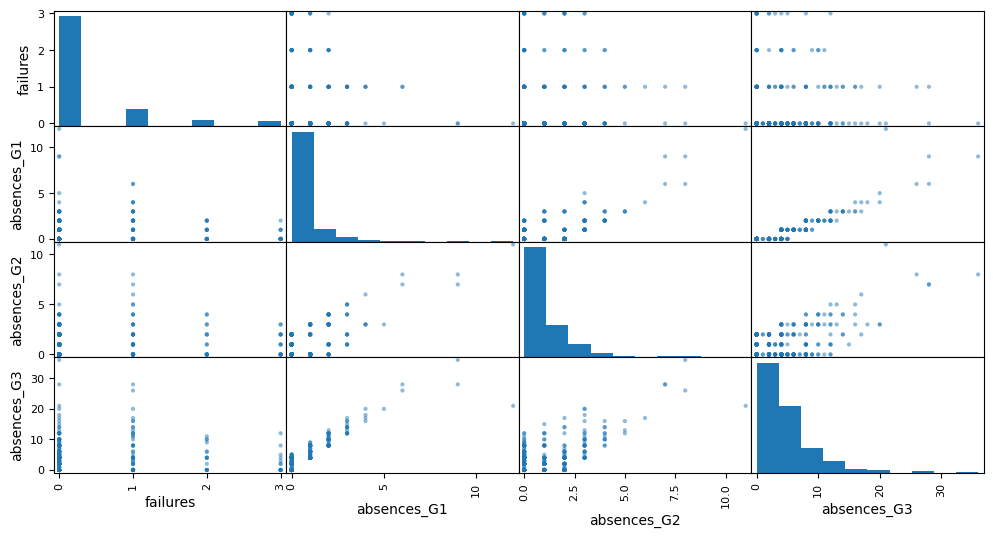

In [13]:
# Not a great visual, somewhat informative. 
from pandas.plotting import scatter_matrix

attributes = ["failures", "absences_G1", "absences_G2", "absences_G3"]

scatter_matrix(data[attributes], figsize=(12, 6))
plt.show()

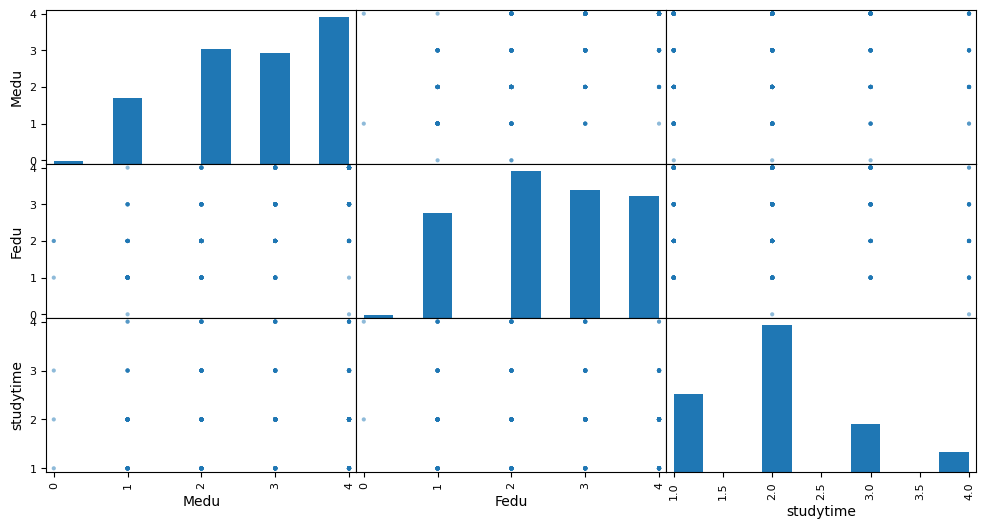

In [14]:
# Worse
from pandas.plotting import scatter_matrix

attributes = ["Medu", "Fedu", "studytime"]

scatter_matrix(data[attributes], figsize=(12, 6))
plt.show()

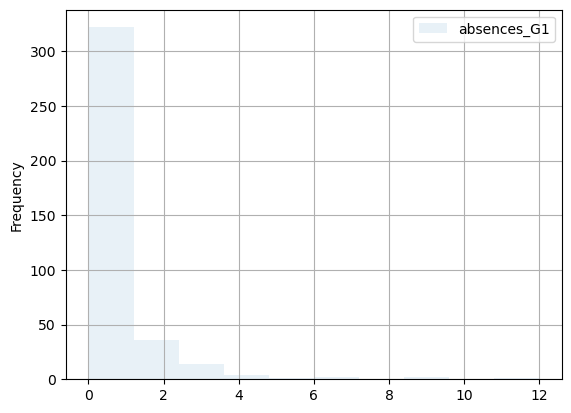

In [15]:
# Grades vs. Absences G1 Term
data.plot(kind="hist", x="G1", y="absences_G1",
             alpha=0.1, grid=True)
plt.show()

# Ultimately it shows the higher rate of absence frequency correlates with lower grades??

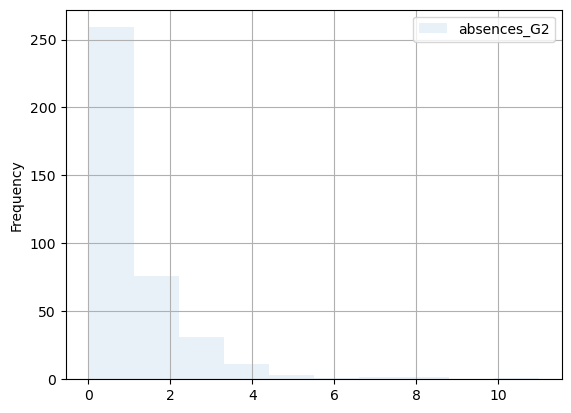

In [16]:
# Grades vs. Absences G2 Term
data.plot(kind="hist", x="G2", y="absences_G2",
             alpha=0.1, grid=True)
plt.show()

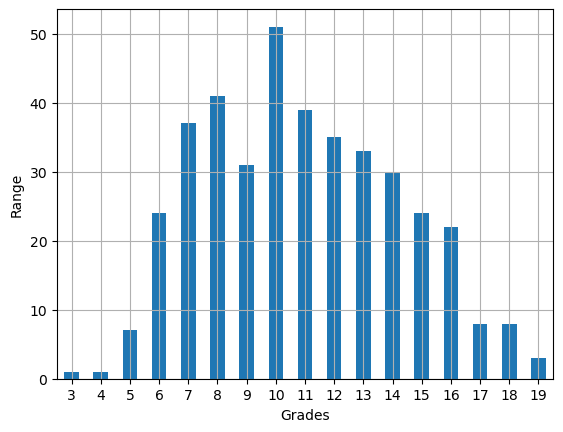

In [17]:
#Trend noted, that as the term progressed more and more students increasingly failed. 
data["G1"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Grades")
plt.ylabel("Range")
plt.show()

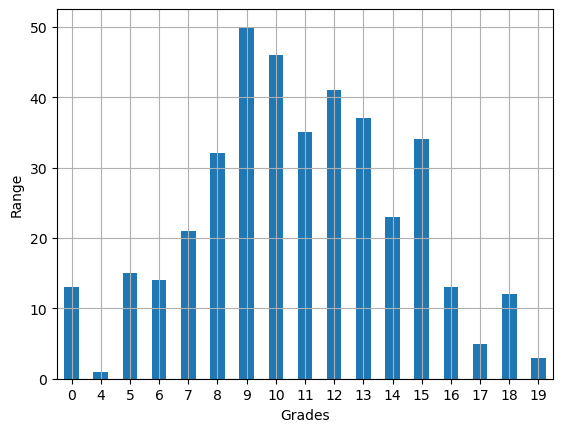

In [18]:
data["G2"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Grades")
plt.ylabel("Range")
plt.show()

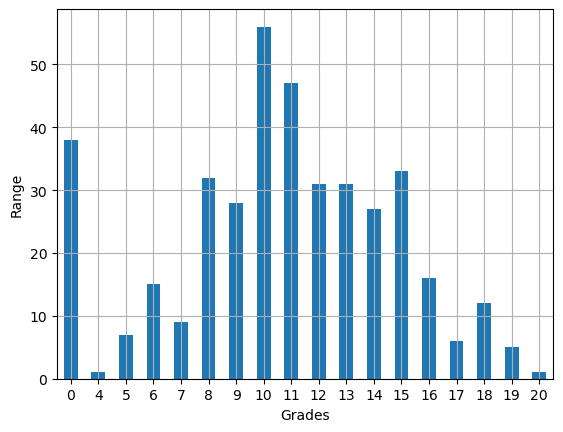

In [19]:
data["G3"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Grades")
plt.ylabel("Range")
plt.show()

## Prepare the Data

### Feature Selection

In [21]:
numeric_columns = [
    'absences_G1',
    'absences_G2',
    'absences_G3',
    'G1',
    'G2',
    'age',
    'freetime',
    'goout',
    'Dalc',
    'Walc',
    'freetime'
]

In [22]:
categorical_columns = [
    'sex',
    'higher',
    'internet'
]

In [23]:
ordinal_columns = [
    'studytime'
]

### Custom Transformer

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

#Whether or not to drop grade columns G1 and G2. 
class FinalProjectTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades=True):
        self.drop_grades = drop_grades

#No fit
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()

#New column absences_sum.
        X_transformed['absences_sum'] = (
            X_transformed['absences_G1'] +
            X_transformed['absences_G2'] +
            X_transformed['absences_G3']
        )

#Drop the individual absence columns. 
        X_transformed.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'], inplace=True)

        if self.drop_grades:
            X_transformed.drop(columns=['G1', 'G2'], inplace=True)

        return X_transformed


### Data Pipelines

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np


In [28]:
# With G1 and G2
numeric_pipeline_with_grades = Pipeline(steps=[
    ('imputer', SimpleImputer().set_output(transform="pandas")),
    ('custom_transformer', FinalProjectTransformer(drop_grades=False)),
    ('scaler', StandardScaler())
])

# Without G1 and G2
numeric_pipeline_without_grades = Pipeline(steps=[
    ('imputer', SimpleImputer().set_output(transform="pandas")),
    ('custom_transformer', FinalProjectTransformer(drop_grades=True)),
    ('scaler', StandardScaler())
])


In [29]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


In [30]:
ordinal_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])


In [31]:
# With G1 and G2
column_transformer_with_grades = ColumnTransformer(transformers=[
    ('num', numeric_pipeline_with_grades, numeric_columns),
    ('cat', categorical_pipeline, categorical_columns),
    ('ord', ordinal_pipeline, ordinal_columns)
])

# Without G1 and G2
column_transformer_without_grades = ColumnTransformer(transformers=[
    ('num', numeric_pipeline_without_grades, numeric_columns),
    ('cat', categorical_pipeline, categorical_columns),
    ('ord', ordinal_pipeline, ordinal_columns)
])


In [32]:
X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)
X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)


In [33]:
print("With grades:", X_train_transformed_with_grades.shape[1])
print("Without grades:", X_train_transformed_without_grades.shape[1])


With grades: 16
Without grades: 14


## Shortlist Promising Models
Fit and compare three regression models to the transformed data, both with and without the G1/G2 columns, using cross-validation. 

In [35]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np


In [36]:
lin_reg = LinearRegression()
svm_reg = SVR()
lasso_reg = Lasso()


In [37]:
# WITH G1 and G2
cv_scores_lin_reg_with_grades = cross_val_score(
    lin_reg, X_train_transformed_with_grades, y_train,
    scoring='neg_mean_squared_error', cv=3
)
rmse_lin_reg_with_grades = np.sqrt(-cv_scores_lin_reg_with_grades.mean())
print("Linear Regression RMSE with grades:", rmse_lin_reg_with_grades)

# WITHOUT G1 and G2
cv_scores_lin_reg_without_grades = cross_val_score(
    lin_reg, X_train_transformed_without_grades, y_train,
    scoring='neg_mean_squared_error', cv=3
)
rmse_lin_reg_without_grades = np.sqrt(-cv_scores_lin_reg_without_grades.mean())
print("Linear Regression RMSE without grades:", rmse_lin_reg_without_grades)

#Based on the RMSA score without G1/G2 (higher RMSE) shows predictions are further off. 

Linear Regression RMSE with grades: 1.9126735881634516
Linear Regression RMSE without grades: 4.482538115070326


In [38]:
# WITH G1 and G2
cv_scores_svm_with_grades = cross_val_score(
    svm_reg, X_train_transformed_with_grades, y_train,
    scoring='neg_mean_squared_error', cv=3
)
rmse_svm_with_grades = np.sqrt(-cv_scores_svm_with_grades.mean())
print("SVM RMSE with grades:", rmse_svm_with_grades)

# WITHOUT G1 and G2
cv_scores_svm_without_grades = cross_val_score(
    svm_reg, X_train_transformed_without_grades, y_train,
    scoring='neg_mean_squared_error', cv=3
)
rmse_svm_without_grades = np.sqrt(-cv_scores_svm_without_grades.mean())
print("SVM RMSE without grades:", rmse_svm_without_grades)

#Based on SVM RMSE scores, without G1/G2 predictions are worse and these features are important. 

SVM RMSE with grades: 2.6857082230584375
SVM RMSE without grades: 4.494856051910754


In [39]:
# WITH G1 and G2
cv_scores_lasso_with_grades = cross_val_score(
    lasso_reg, X_train_transformed_with_grades, y_train,
    scoring='neg_mean_squared_error', cv=3
)
rmse_lasso_with_grades = np.sqrt(-cv_scores_lasso_with_grades.mean())
print("Lasso Regression RMSE with grades:", rmse_lasso_with_grades)

# WITHOUT G1 and G2
cv_scores_lasso_without_grades = cross_val_score(
    lasso_reg, X_train_transformed_without_grades, y_train,
    scoring='neg_mean_squared_error', cv=3
)
rmse_lasso_without_grades = np.sqrt(-cv_scores_lasso_without_grades.mean())
print("Lasso Regression RMSE without grades:", rmse_lasso_without_grades)

#Based on scores, important features and lasso is not downweighting or ignoring G1/G2 features.

Lasso Regression RMSE with grades: 2.169736406171389
Lasso Regression RMSE without grades: 4.589666841138178


## Fine-Tuning the System

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR


In [42]:
#Find best combination of parameters.

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2],
    'kernel': ['linear', 'rbf']
}


In [43]:
#Find the best SVR model.

grid_search = GridSearchCV(
    SVR(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=0  
)


In [44]:
grid_search.fit(X_train_transformed_with_grades, y_train)
best_params_with_grades = grid_search.best_params_
print("Best parameters (with grades):", best_params_with_grades)

# Convert score to RMSE
best_score_with_grades = np.sqrt(-grid_search.best_score_)
print("Best RMSE score (with grades):", best_score_with_grades)


Best parameters (with grades): {'C': 1, 'epsilon': 0.2, 'kernel': 'linear'}
Best RMSE score (with grades): 1.976704391110258


In [45]:
grid_search.fit(X_train_transformed_without_grades, y_train)
best_params_without_grades = grid_search.best_params_
print("Best parameters (without grades):", best_params_without_grades)

# Convert score to RMSE
best_score_without_grades = np.sqrt(-grid_search.best_score_)
print("Best RMSE score (without grades):", best_score_without_grades)


Best parameters (without grades): {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Best RMSE score (without grades): 4.494856051910754


## Measure Performance on Test Set


In [47]:
from sklearn.metrics import mean_squared_error, r2_score


In [48]:
# Best model with G1 and G2
best_model_with_grades = SVR(**best_params_with_grades)
best_model_with_grades.fit(X_train_transformed_with_grades, y_train)

# Best model without G1 and G2
best_model_without_grades = SVR(**best_params_without_grades)
best_model_without_grades.fit(X_train_transformed_without_grades, y_train)


SVR(C=1)

In [49]:
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test)
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)


In [50]:
y_pred_with_grades = best_model_with_grades.predict(X_test_transformed_with_grades)
rmse_with_grades = mean_squared_error(y_test, y_pred_with_grades, squared=False)
r2_with_grades = r2_score(y_test, y_pred_with_grades)

print("RMSE with grades:", rmse_with_grades)
print("R² with grades:", r2_with_grades)

#Based on RMSE on average model's predictions are 2.06 grade points off. 
#Rsq shows model explains 79% of variation. 

RMSE with grades: 2.0584458331568034
R² with grades: 0.7933582306518502


In [51]:
y_pred_without_grades = best_model_without_grades.predict(X_test_transformed_without_grades)
rmse_without_grades = mean_squared_error(y_test, y_pred_without_grades, squared=False)
r2_without_grades = r2_score(y_test, y_pred_without_grades)

print("RMSE without grades:", rmse_without_grades)
print("R² without grades:", r2_without_grades)


RMSE without grades: 4.3486309043185445
R² without grades: 0.07775922216745412
